In [5]:
#Explore data for pricing protection content
#Author: tdrown@hardinet.org
#3/21/2023

import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir(r'C:\Users\tdrown\Documents\Price Protection')

In [9]:
#New orders, Total Inventories, Unfilled Orders
census_list = []
for f in os.listdir(r'C:\Users\tdrown\Documents\Price Protection'):
    print(f)
    file = f
    census_list.append(f)
    
census_list = census_list[3:8]

ppi_file = r"C:\Users\tdrown\Documents\Price Protection\HVAC PPI.csv"
ppi_head = ['date', 'ppi']
val_list = ['new_orders', 'tot_inv', 'unfilled', 'inv', 'sales']
census_list

Chiller Interview 3.docx
Domestic Water Heater PPI.csv
HVAC PPI.csv
Laundry and Drycleaning Machinery PPI.csv
M3-mf.zip
Manufacturers' Shipments, Inv, and Orders  - New Orders.csv
Manufacturers' Shipments, Inv, and Orders  - Total Inventories.csv
Manufacturers' Shipments, Inv, and Orders  - Unfilled Orders.csv
Monthly Wholesale Trade - Inventories.csv
Monthly Wholesale Trade - Sales.csv
TRENDS Monthly 2023_02_25.xlsx
trends.xlsx


['Laundry and Drycleaning Machinery PPI.csv',
 'M3-mf.zip',
 "Manufacturers' Shipments, Inv, and Orders  - New Orders.csv",
 "Manufacturers' Shipments, Inv, and Orders  - Total Inventories.csv",
 "Manufacturers' Shipments, Inv, and Orders  - Unfilled Orders.csv"]

In [10]:
ppi = pd.read_csv(ppi_file, header=0, names=ppi_head)
ppi['date'] = pd.to_datetime(ppi['date'])
ppi.set_index('date', inplace=True)

man = pd.DataFrame()
for i in range(0,3):
    print(census_list[i])
    load = pd.read_csv(census_list[i], skiprows=7)
    load = load.rename(columns = {'Value': val_list[i]})
    load['Period'] = pd.to_datetime(load['Period'])
    load.set_index('Period', inplace=True)
    man = pd.concat([man, load], axis=1)

man = man[man.index < '2023-02-01'] #remove remove NAs at end of data
man

man[man.index > '2015-01-01'].plot()

Laundry and Drycleaning Machinery PPI.csv


KeyError: 'Period'

In [47]:
#Calc year over year growth
man['new_yy'] = man['new_orders']

            new_orders  tot_inv  unfilled  new_yy
Period                                           
2020-01-01      3619.0   6278.0    6438.0  3619.0
2020-02-01      3667.0   6416.0    6422.0  3667.0
2020-03-01      4089.0   6333.0    6703.0  4089.0
2020-04-01      3291.0   6251.0    6697.0  3291.0
2020-05-01      3405.0   6234.0    6668.0  3405.0
2020-06-01      3975.0   6099.0    6833.0  3975.0
2020-07-01      4038.0   5747.0    6840.0  4038.0
2020-08-01      4106.0   5658.0    6926.0  4106.0
2020-09-01      4087.0   5699.0    6972.0  4087.0
2020-10-01      3994.0   5754.0    6927.0  3994.0
2020-11-01      3973.0   5855.0    6954.0  3973.0
2020-12-01      4090.0   6063.0    7077.0  4090.0
2021-01-01      4136.0   5964.0    7069.0  4136.0
2021-02-01      4300.0   5958.0    7297.0  4300.0
2021-03-01      4209.0   5982.0    7487.0  4209.0
2021-04-01      4307.0   5901.0    7701.0  4307.0
2021-05-01      4287.0   5895.0    7909.0  4287.0
2021-06-01      4041.0   6008.0    7922.0  4041.0


<AxesSubplot:xlabel='Period'>

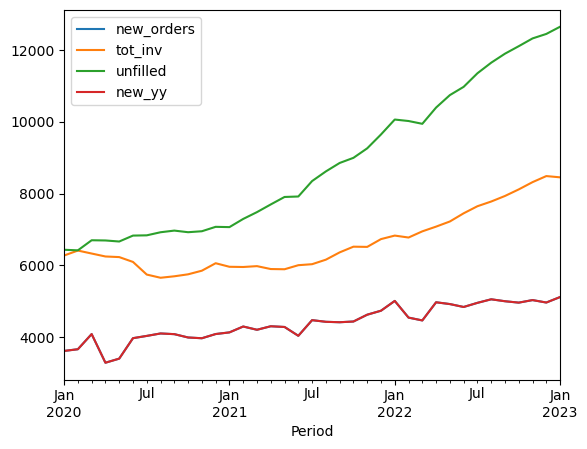

In [48]:
print(man[man.index >= '2020-01-01'])
man[man.index >= '2020-01-01'].plot()

Monthly Wholesale Trade - Inventories.csv
Monthly Wholesale Trade - Sales.csv
                inv    sales  sales_cng
Period                                 
2020-01-01  29752.0  14057.0  -0.643200
2020-02-01  29833.0  14279.0   1.579284
2020-03-01  29830.0  13648.0  -4.419077
2020-04-01  29793.0  12217.0 -10.485053
2020-05-01  29065.0  13547.0  10.886470
2020-06-01  28637.0  14713.0   8.607072
2020-07-01  28769.0  15032.0   2.168151
2020-08-01  29120.0  14910.0  -0.811602
2020-09-01  29781.0  15043.0   0.892019
2020-10-01  30883.0  14982.0  -0.405504
2020-11-01  31200.0  14965.0  -0.113469
2020-12-01  31295.0  15482.0   3.454728
2021-01-01  31858.0  15354.0  -0.826767
2021-02-01  32283.0  15043.0  -2.025531
2021-03-01  32886.0  15886.0   5.603935
2021-04-01  33253.0  16181.0   1.856981
2021-05-01  33691.0  16134.0  -0.290464
2021-06-01  34045.0  16460.0   2.020578
2021-07-01  34685.0  16142.0  -1.931956
2021-08-01  35545.0  16269.0   0.786767
2021-09-01  36605.0  16173.0  -0.590079
20

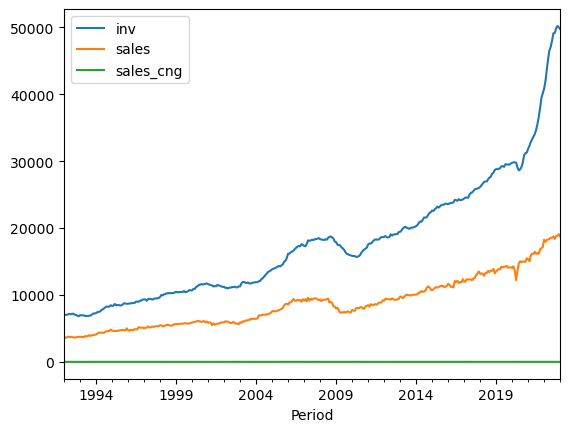

In [49]:
ws = pd.DataFrame()
for i in range(3,5):
    print(census_list[i])
    load = pd.read_csv(census_list[i], skiprows=7)
    load = load.rename(columns = {'Value': val_list[i]})
    load['Period'] = pd.to_datetime(load['Period'])
    load.set_index('Period', inplace=True)
    ws = pd.concat([ws, load], axis=1)

ws.dropna(inplace=True)
ws['sales_cng'] = ws['sales'].pct_change() * 100

ws.plot()
print(ws[ws.index >= '2020-01-01'])

<AxesSubplot:xlabel='Period'>

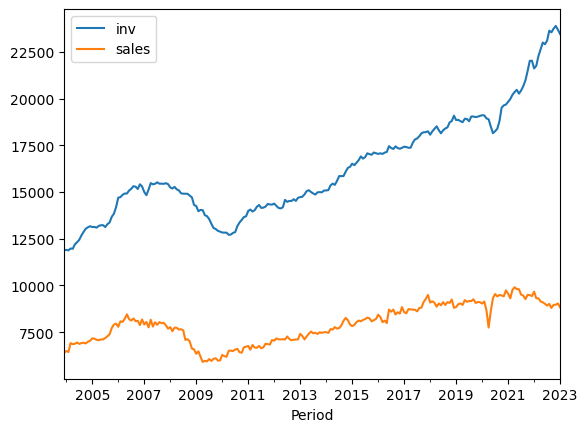

In [50]:
ws_adj = ws[ws.index >= '2003-12-01'].copy()
ws_adj = ws_adj.merge(ppi, how='left', left_index=True, right_index=True)

for i in ['inv', 'sales']:
    ws_adj[i] = ws_adj[i]/ws_adj['ppi'] * 100
    
ws_adj[['inv', 'sales']].plot()

In [71]:
census

NameError: name 'census' is not defined